#### Constructing A Sliding Window

A sliding window is a fixed size rectangle mask that slides from left to right and top to bottom of an image. At each step of sliding, the window will stop and we will extract the region of interest (ROI).

This ROI will be passed through our trained classifier model to obtain some output predictions.

In [12]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/github/objectdetection/option1/'
prediction = path+ '/prediction'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [13]:
import os
import cv2

predictionList=[]
for eachFile in os.listdir(prediction):
  if eachFile.startswith('uturn'):
    imagePath=path+'prediction'+'/'+eachFile
    image= cv2.imread(imagePath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    predictionList.append((eachFile,'uturn',image))
  else:
    imagePath=path+'prediction'+'/'+eachFile
    image= cv2.imread(imagePath)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    predictionList.append((eachFile,'stop',image))
predictionList[0]


('uturn1.jpg',
 'uturn',
 array([[[219, 219, 221],
         [219, 219, 221],
         [219, 219, 221],
         ...,
         [ 70,  83,  65],
         [ 67,  78,  62],
         [ 64,  75,  59]],
 
        [[219, 219, 221],
         [219, 219, 221],
         [219, 219, 221],
         ...,
         [ 71,  84,  66],
         [ 69,  80,  64],
         [ 67,  78,  62]],
 
        [[219, 219, 221],
         [219, 219, 221],
         [219, 219, 221],
         ...,
         [ 72,  85,  67],
         [ 71,  82,  66],
         [ 69,  80,  64]],
 
        ...,
 
        [[123, 121, 122],
         [123, 121, 122],
         [123, 121, 122],
         ...,
         [ 69,  76,  43],
         [ 69,  76,  43],
         [ 68,  75,  42]],
 
        [[126, 124, 125],
         [125, 123, 124],
         [124, 122, 123],
         ...,
         [ 69,  76,  45],
         [ 69,  76,  45],
         [ 69,  76,  45]],
 
        [[125, 123, 124],
         [125, 123, 124],
         [123, 121, 122],
         ...,
   

#### Construct An Image Pyramid

Image pyramids are constructed to produce images at different scales. It will allow us to find objects in images at different scales(ie. sizes) in an image.

At the bottom of the image pyramid is the original image at its original size.

At each subseqent layer, the image is resized and this continue for each layer until the stopping criterion is met. This is usually a minimum size.

<details>

1. For stop sign stop2.jpg

  * WIDTH = 600
  * PYR_SCALE = 1.2
  * WIN_STEP =100
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150)

2. For uturn sign uturn1.jpg
  * WIDTH = 600
  * PYR_SCALE = 1.2
  * WIN_STEP =50
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150)

3. For uturn sign uturn2.jpg
  * WIDTH = 600
  * PYR_SCALE = 1.01
  * WIN_STEP =150
  * ROI_SIZE = (150,150)
  * INPUT_SIZE = (150, 150)



<summary>
Click To See Possible Answers Based On Model
</summary>


</details>

#### Task 5 : Adjust The Sliding Window Parameters

In [14]:
WIDTH = 600
PYR_SCALE = 1.2
WIN_STEP =50
ROI_SIZE = (150, 150)
INPUT_SIZE = (150, 150)

#### Task 6 : Select Image For Object Detection

Manualy select the image from 'Prediction' folder for object detection.


In [15]:
predictionList[0][2].shape
trialImage=predictionList[1][0]
trialImage

'stop2.jpg'

In [16]:
imagePath=path+'prediction'+'/'+trialImage
imagePath

'/content/drive/MyDrive/github/objectdetection/option1/prediction/stop2.jpg'

In [17]:
import sys
sys.path.append(path)

**Quick reminder:**

***'od'*** is from

***import slidingwindowobjectdetectionutils as od***


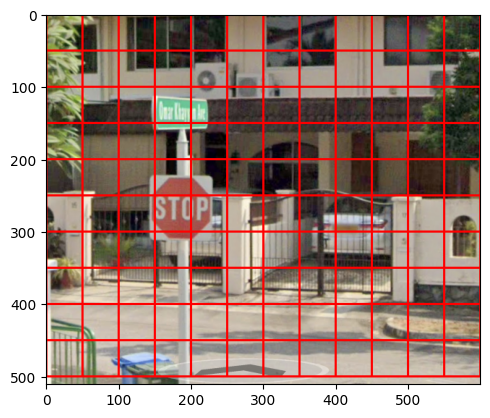

In [18]:
import slidingwindowobjectdetectionutils as od
od.showROI(imagePath,WIDTH,WIN_STEP,ROI_SIZE)

511 600
Width: 600
image : (511, 600, 3)
image : (425, 500, 3)
image : (353, 416, 3)
image : (293, 346, 3)
image : (243, 288, 3)
image : (202, 240, 3)
image : (168, 200, 3)
(150, 150, 3) (150, 150, 3)
[INFO] looping over pyramid/windows took 0.03428 seconds
Total images 182.00


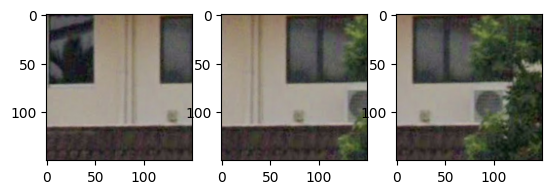

In [19]:
import imutils

image=cv2.imread(path+'prediction/'+trialImage)

orig = image
orig = imutils.resize(orig, width = WIDTH)
(H, W) = orig.shape[:2]
print(H,W)



rois,locs=od.setUpROI(orig, WIN_STEP, PYR_SCALE, ROI_SIZE, INPUT_SIZE)

In [20]:
from tensorflow import keras
from tensorflow.keras.models import load_model


model = keras.models.load_model('/content/drive/MyDrive/github/objectdetection/model.h5')

my_preds = od.classifyROI(rois, model)


(182, 150, 150, 3)
[INFO] classifying ROIs...
6/6 [==============================] - 3s 63ms/step
[INFO] classifying ROIs took 2.73179 seconds


In [21]:
import slidingwindowobjectdetectionutils as od
import numpy as np

def thresholdPrediction(my_preds, trialImage, threshold):
    preds=[]
    for each in my_preds:
        predicted_class_index = np.argmax(each)
        predicted_probability = each[predicted_class_index]
        if predicted_probability >= threshold:
            preds.append([(trialImage,'uturn',predicted_probability)])
    return preds

threshold = 0.5

my_preds = od.classifyROI(rois, model)
preds = thresholdPrediction(my_preds, trialImage, threshold)
labels = od.createLabelsBoxesProb(preds, locs)


(182, 150, 150, 3)
[INFO] classifying ROIs...
6/6 [==============================] - 0s 9ms/step
[INFO] classifying ROIs took 0.32490 seconds
{'uturn': [((0, 0, 150, 150), 1.0), ((50, 0, 200, 150), 1.0), ((100, 0, 250, 150), 1.0), ((150, 0, 300, 150), 1.0), ((200, 0, 350, 150), 1.0), ((250, 0, 400, 150), 1.0), ((300, 0, 450, 150), 1.0), ((350, 0, 500, 150), 1.0), ((400, 0, 550, 150), 1.0), ((450, 0, 600, 150), 1.0), ((0, 50, 150, 200), 1.0), ((50, 50, 200, 200), 1.0), ((100, 50, 250, 200), 1.0), ((150, 50, 300, 200), 1.0), ((200, 50, 350, 200), 1.0), ((250, 50, 400, 200), 1.0), ((300, 50, 450, 200), 1.0), ((350, 50, 500, 200), 1.0), ((400, 50, 550, 200), 1.0), ((450, 50, 600, 200), 1.0), ((0, 100, 150, 250), 1.0), ((50, 100, 200, 250), 1.0), ((100, 100, 250, 250), 1.0), ((150, 100, 300, 250), 1.0), ((200, 100, 350, 250), 1.0), ((250, 100, 400, 250), 1.0), ((300, 100, 450, 250), 1.0), ((350, 100, 500, 250), 1.0), ((400, 100, 550, 250), 1.0), ((450, 100, 600, 250), 1.0), ((0, 150, 150, 3

#### Task 7: Generate Object Detection Result

Code will produce best 5 predicted bounding boxes on object detected in image.

Observe the prediction as your adjust parameteres in Task 5.

In [22]:
import tensorflow as tf
import cv2
import numpy as np

# Load an image
image = cv2.imread(path + 'prediction/' + trialImage)
# Resize the image to match the input size expected by the model
image = cv2.resize(image, (150, 150))

# Convert the image to a NumPy array
image_array = np.array(image)

# Reshape the array to match the input shape expected by the model
image_array = image_array.reshape(1, 150, 150, 3)

# Perform object detection
results = model.predict(image_array)

# Print the results
print(results)


1/1 [==============================] - 0s 292ms/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
